# **Customer Churn Prediction**

**Manusha Fernando** | [romanfern@proton.me](mailto:romanfern@proton.me) | [GitHub](https://github.com/ROMANFern)


## Importing Libraries & Loading Data
* Imports essential libraries for data manipulation, visualization, and machine learning.

* Loads the Telco Customer Churn dataset into a Pandas DataFrame.

* Displays dataset structure & first few rows for initial inspection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display basic info about the dataset
df.info()

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking for Missing Values

* Checks for missing values in the dataset to determine if any columns need data cleaning.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Checking Data Types

* Displays data types of all columns to identify categorical and numerical features.


In [3]:
# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Converting `TotalCharges` to Numeric

* Converts `TotalCharges` (originally object/string) into numeric.

* Uses `errors='coerce'` to convert invalid entries to NaN.

* Checks if missing values appeared due to conversion.


In [4]:
# Check class distribution (churned vs. not churned customers)
churn_distribution = df['Churn'].value_counts(normalize=True) * 100  # Convert to percentage
print("\nChurn Distribution (%):\n", churn_distribution)


Churn Distribution (%):
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## Dropping Rows with Missing `TotalCharges`

* Drops rows with missing `TotalCharges` values (since there are only a few).

* Resets the index after removing rows.


In [5]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle any potential issues
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if there are any missing values after conversion (this can happen if there were empty strings)
missing_total_charges = df['TotalCharges'].isnull().sum()

# Display the number of missing values in 'TotalCharges'
print(f"Missing values in TotalCharges after conversion: {missing_total_charges}")

# Display updated data types
print("\nUpdated Data Types:\n", df.dtypes)

Missing values in TotalCharges after conversion: 11

Updated Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


## Encoding Categorical Variables (`Churn` and Binary Features)

* Converts `Churn` into a binary format (0/1).

* Converts binary categorical features (`Yes/No`) into 0/1.


In [6]:
# Drop rows where 'TotalCharges' is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Verify that there are no missing values left
print(f"Missing values in TotalCharges after dropping rows: {df['TotalCharges'].isnull().sum()}")
print(f"Dataset shape after dropping rows: {df.shape}")

Missing values in TotalCharges after dropping rows: 0
Dataset shape after dropping rows: (7032, 21)


## One-Hot Encoding for Multi-Class Categorical Features

* Encodes categorical variables using one-hot encoding.

* Drops one category per feature to avoid the dummy variable trap.


In [7]:
# Convert 'Churn' column to binary (0 = No, 1 = Yes)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Convert all binary 'Yes/No' columns to 0/1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

# Verify the changes
print(df[binary_cols + ['Churn']].head())

   Partner  Dependents  PhoneService  PaperlessBilling  Churn
0        1           0             0                 1      0
1        0           0             1                 0      0
2        0           0             1                 1      1
3        0           0             0                 0      0
4        0           0             1                 1      1


## Splitting Data into Train & Test Sets

* Splits data into 80% training & 20% testing.

* Uses `stratify=y` to maintain churn distribution in both sets.


In [8]:
# Convert 'gender' into binary (0 = Female, 1 = Male)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Apply one-hot encoding to categorical variables with more than two categories
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify the changes
print(f"Dataset shape after encoding: {df.shape}")
print(df.head())

Dataset shape after encoding: (7032, 32)
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                     

## Cleaning and Preparing the Dataset

* Drops the **`customerID`** column as it is not relevant for machine learning modeling.

* Converts all **boolean columns** into integer format (`0` or `1`) to ensure compatibility with ML algorithms.

* Applies `astype(int)` to all columns, standardizing data types for efficient processing.

* Prints the **updated dataset shape** to confirm changes.

* Displays the first few rows to verify that the cleaning process was executed correctly.

In [9]:
# Drop the 'customerID' column since it's not useful for modeling
df.drop(columns=['customerID'], inplace=True)

# Convert all boolean columns to integers (0/1)
df = df.astype(int)

# Verify changes
print(f"Dataset shape after cleaning: {df.shape}")
print(df.head())

Dataset shape after cleaning: (7032, 31)
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1              29            29      0  ...   
1                 0              56          1889      0  ...   
2                 1              53           108      1  ...   
3                 0              42          1840      0  ...   
4                 1              70           151      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0 

## Normalizing Numerical Features

* Defines Min-Max Scaler to transform numerical values into a normalized range.

* Lists numerical columns (`tenure`, `MonthlyCharges`, `TotalCharges`) for scaling.

* Applies Min-Max Scaling to ensure all values are within a standard range.

* Verifies the transformation by displaying the updated dataset.


In [10]:
# Define the scaler
scaler = MinMaxScaler()

# List of numerical columns to normalize
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Min-Max Scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify changes
print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1            0.11      0.001269      0  ...   
1                 0            0.38      0.215901      0  ...   
2                 1            0.35      0.010385      1  ...   
3                 0            0.24      0.210247      0  ...   
4                 1            0.52      0.015347      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0        

## Handling Class Imbalance with SMOTE

* Applies Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset.

* Increases the number of churned customer samples to ensure better model training.

* Helps improve recall by providing more churn examples for the model to learn from.


In [11]:
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features (excluding target)
y = df['Churn']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training Set: X_train = (5625, 30), y_train = (5625,)
Testing Set: X_test = (1407, 30), y_test = (1407,)


## Training Logistic Regression Model

* Initializes a Logistic Regression model with balanced class weights.

* Trains the model on the preprocessed training dataset.

* Provides a baseline for comparison with more complex models.


In [25]:
# Convert classes to a NumPy array
classes = np.array([0, 1])

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Convert class weights into a dictionary format
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Initialize and train the logistic regression model
log_reg = LogisticRegression(class_weight=class_weight_dict, max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7257
Precision: 0.4900
Recall: 0.7888
F1 Score: 0.6045
ROC-AUC Score: 0.8354


## Training Random Forest Model

* Initializes a Random Forest classifier with 100 trees.

* Uses class balancing to improve predictions for the minority class (churners).

* Fits the model on the training data for performance comparison.


In [14]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print results
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(f"Random Forest - ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest - Accuracy: 0.7825
Random Forest - Precision: 0.6126
Random Forest - Recall: 0.4947
Random Forest - F1 Score: 0.5473
Random Forest - ROC-AUC Score: 0.8202


## Training and Evaluating XGBoost Model

* Initializes the **XGBoost model** with `n_estimators=100` and `learning_rate=0.1` for effective training.

* Disables label encoding (`use_label_encoder=False`) and sets `eval_metric='logloss'` to optimize the loss function.

* Trains the model on the **training dataset (`X_train, y_train`)** to learn from customer data.

* Makes predictions on the **test dataset (`X_test`)** and calculates churn probability scores.

* Evaluates model performance using key metrics:
  - **Accuracy:** Measures overall correctness of predictions.
  - **Precision:** Determines how many predicted churn cases are correct.
  - **Recall:** Measures the model's ability to detect actual churners.
  - **F1 Score:** Balances precision and recall for robust performance.
  - **ROC-AUC Score:** Assesses how well the model distinguishes between churners and non-churners.

* Prints the evaluation results to assess the model's effectiveness and guide further improvements.

In [15]:
# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print results
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1 Score: {f1_xgb:.4f}")
print(f"XGBoost - ROC-AUC Score: {roc_auc_xgb:.4f}")

XGBoost - Accuracy: 0.7861
XGBoost - Precision: 0.6130
XGBoost - Recall: 0.5294
XGBoost - F1 Score: 0.5681
XGBoost - ROC-AUC Score: 0.8289


C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Feature Engineering for Customer Churn Prediction

* Categorizes `tenure` into bins to classify customers as **New (0-12 months), Regular (12-24 months), or Loyal (24+ months)**.

* Calculates `AvgSpendPerMonth` by dividing `TotalCharges` by (`tenure` + 1) to avoid division by zero, providing a normalized spending metric.

* Creates `StreamingService_Combined`, summing `StreamingTV_Yes` and `StreamingMovies_Yes`, indicating whether a customer subscribes to both services.

* Defines a `ChurnRisk_High` indicator, flagging high-risk customers who:
  - Spend a lot (MonthlyCharges > 75%)
  - Are on a month-to-month contract
  - Have a short tenure (< 20% of max tenure)

* Verifies new features by displaying the first few rows of the dataset with the engineered columns.

In [16]:
# Categorize 'tenure' into bins
df['TenureCategory'] = pd.cut(df['tenure'], bins=[0, 12, 24, np.inf], labels=['New', 'Regular', 'Loyal'])

# Calculate average spending per month
df['AvgSpendPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)

# Create interaction features
df['StreamingService_Combined'] = df[['StreamingTV_Yes', 'StreamingMovies_Yes']].sum(axis=1)

# Churn risk indicator: High Monthly Charge + Month-to-Month Contract + Short Tenure
df['ChurnRisk_High'] = ((df['MonthlyCharges'] > 0.75) &  # High spending
                        (df['Contract_One year'] == 0) & (df['Contract_Two year'] == 0) &  # Month-to-month
                        (df['tenure'] < 0.2)).astype(int)  # Short tenure

# Verify new features
print(df[['tenure', 'TenureCategory', 'AvgSpendPerMonth', 'StreamingService_Combined', 'ChurnRisk_High']].head())

     tenure TenureCategory  AvgSpendPerMonth  StreamingService_Combined  \
0  0.000000            NaN          0.001269                          0   
1  0.464789            New          0.147394                          0   
2  0.014085            New          0.010241                          0   
3  0.619718            New          0.129805                          0   
4  0.014085            New          0.015134                          0   

   ChurnRisk_High  
0               0  
1               0  
2               0  
3               0  
4               0  


## One-Hot Encoding Tenure Category

* One-hot encodes `TenureCategory` to convert categorical labels into numerical form for model compatibility.

* Drops the first category to avoid multicollinearity in machine learning models.

* Verifies changes by displaying the first few rows of the updated dataset.



In [17]:
# One-hot encode 'TenureCategory'
df = pd.get_dummies(df, columns=['TenureCategory'], drop_first=True)

# Verify changes
print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1            0.11      0.001269      0  ...   
1                 0            0.38      0.215901      0  ...   
2                 1            0.35      0.010385      1  ...   
3                 0            0.24      0.210247      0  ...   
4                 1            0.52      0.015347      1  ...   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0  

## Retraining XGBoost and Evaluating Performance

* Redefines features (`X`) and target (`y`) to include the newly engineered features while excluding `Churn`.

* Splits the updated dataset into **training (80%) and testing (20%)** sets while maintaining class distribution (`stratify=y`).

* Retrains the **XGBoost model** on the updated dataset to reflect newly engineered features.

* Makes predictions on the test set and calculates probability scores for churn.

* Evaluates model performance using key metrics:
  - **Accuracy:** Measures overall correctness.
  - **Precision:** Ensures fewer false positives.
  - **Recall:** Captures actual churn cases.
  - **F1 Score:** Balances precision and recall.
  - **ROC-AUC Score:** Assesses model discrimination ability.

* Displays the updated performance metrics to compare improvements after feature engineering.

In [18]:
# Define features (X) and target (y) again
X = df.drop(columns=['Churn'])  # Exclude target variable
y = df['Churn']

# Split the updated dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Retrain XGBoost
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate performance again
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print new results
print(f"Updated XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"Updated XGBoost - Precision: {precision_xgb:.4f}")
print(f"Updated XGBoost - Recall: {recall_xgb:.4f}")
print(f"Updated XGBoost - F1 Score: {f1_xgb:.4f}")
print(f"Updated XGBoost - ROC-AUC Score: {roc_auc_xgb:.4f}")

Updated XGBoost - Accuracy: 0.7932
Updated XGBoost - Precision: 0.6246
Updated XGBoost - Recall: 0.5561
Updated XGBoost - F1 Score: 0.5884
Updated XGBoost - ROC-AUC Score: 0.8327


C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Hyperparameter Tuning for XGBoost

* Defines a **parameter grid** with different values for `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree` to find the best configuration.

* Initializes the **XGBoost model** with `use_label_encoder=False` and `eval_metric='logloss'` to optimize performance and prevent unnecessary warnings.

* Performs **Grid Search with cross-validation (cv=3)** to systematically evaluate different hyperparameter combinations using `f1` as the scoring metric.

* Uses `n_jobs=-1` to enable parallel processing and `verbose=2` to display progress updates.

* Trains multiple models with different parameter settings and selects the **best-performing combination** based on the highest F1-score.

* Prints the **best hyperparameter values** for fine-tuning the XGBoost model.



In [19]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}


C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Training and Evaluating the Fine-Tuned XGBoost Model

* Trains the **final XGBoost model** using the best hyperparameters obtained from Grid Search.

* Initializes the model with optimized values while keeping `use_label_encoder=False` and `eval_metric='logloss'` to ensure efficiency.

* Fits the model on the **training dataset (X_train, y_train)** to learn from the refined feature set.

* Makes predictions on the **test dataset (X_test)** and computes probability scores for churn classification.

* Evaluates the fine-tuned model's performance using key metrics:
  - **Accuracy:** Measures the overall correctness of predictions.
  - **Precision:** Determines the proportion of correctly predicted churners.
  - **Recall:** Measures the ability to detect actual churners.
  - **F1 Score:** Balances precision and recall.
  - **ROC-AUC Score:** Evaluates how well the model distinguishes churners from non-churners.

* Prints the updated performance metrics to assess improvements achieved through hyperparameter tuning.

In [20]:
# Train final model with best parameters
best_xgb = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the fine-tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

# Print results
print(f"Tuned XGBoost - Accuracy: {accuracy_best:.4f}")
print(f"Tuned XGBoost - Precision: {precision_best:.4f}")
print(f"Tuned XGBoost - Recall: {recall_best:.4f}")
print(f"Tuned XGBoost - F1 Score: {f1_best:.4f}")
print(f"Tuned XGBoost - ROC-AUC Score: {roc_auc_best:.4f}")

C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost - Accuracy: 0.7903
Tuned XGBoost - Precision: 0.6254
Tuned XGBoost - Recall: 0.5267
Tuned XGBoost - F1 Score: 0.5718
Tuned XGBoost - ROC-AUC Score: 0.8388


## Feature Importance Analysis with XGBoost

* Extracts **feature importance scores** from the fine-tuned XGBoost model to determine the most influential factors for predicting churn.

* Creates a **DataFrame** containing feature names and their corresponding importance scores.

* Sorts features in **descending order** to highlight the most impactful variables.

* Generates a **bar plot using Seaborn** to visually represent feature importance:
  - **X-axis:** Importance score of each feature.
  - **Y-axis:** Feature names ranked from most to least important.
  - **Title:** Clearly indicates that the visualization represents feature importance for XGBoost.

* Displays the final plot to aid in business decision-making and model interpretation.

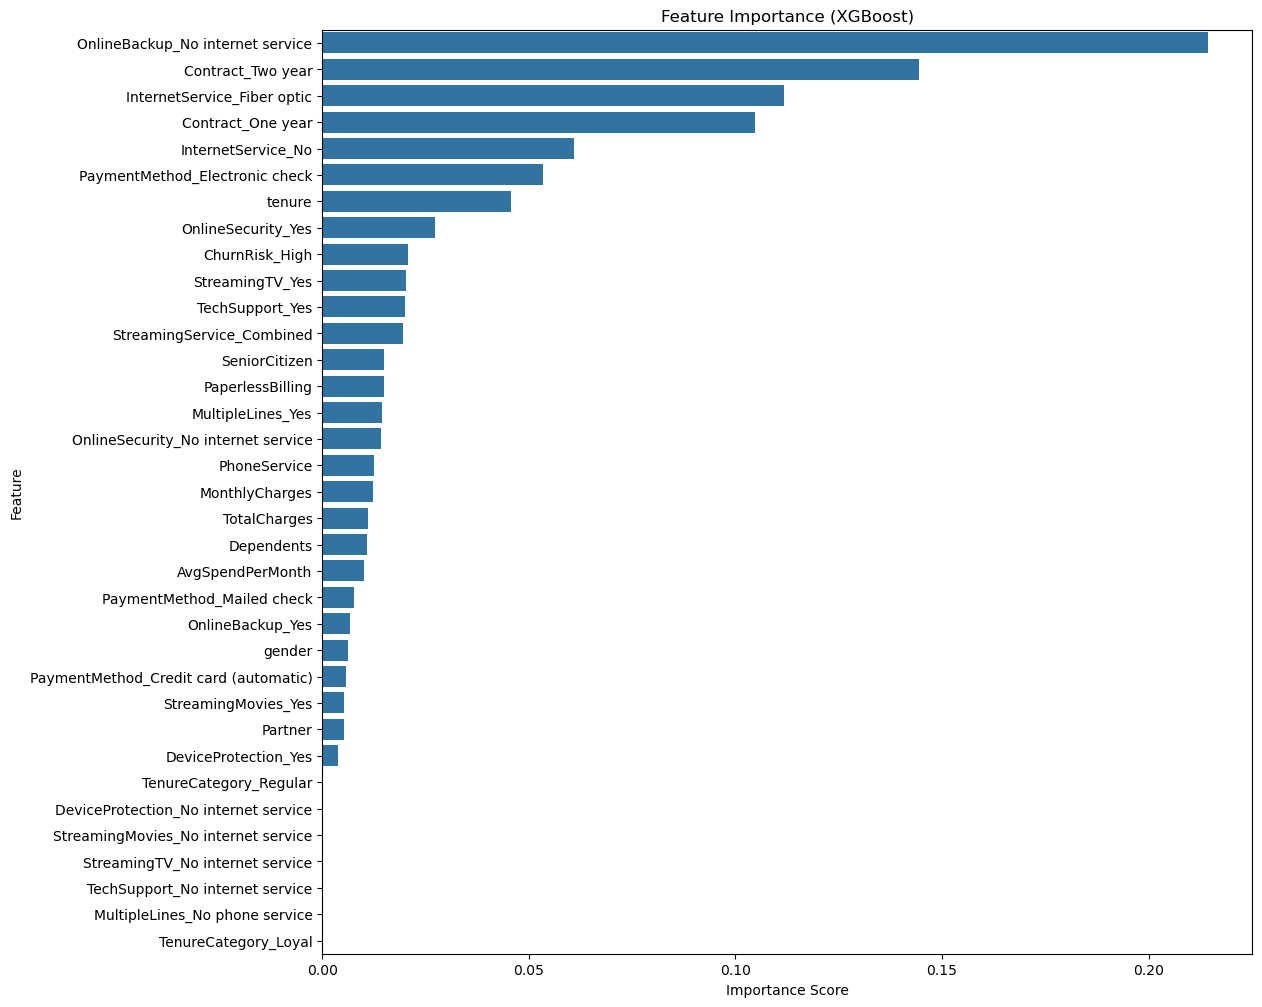

In [21]:
# Get feature importances from the tuned XGBoost model
feature_importances = best_xgb.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,12))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Feature Selection and Retraining XGBoost

* Identifies **weak features** that contribute minimally to churn prediction based on feature importance scores.

* Drops less important features such as `gender`, `Partner`, and certain categorical features related to internet services to simplify the model.

* Splits the dataset again to ensure the training and test sets reflect the refined feature set.

* Retrains the **XGBoost model** using the reduced feature set to evaluate performance improvements.

* Makes predictions on the updated test set and computes churn probability scores.

* Evaluates the new model's performance by recalculating key metrics:
  - **Accuracy:** Measures overall correctness.
  - **Precision:** Determines the proportion of correct churn predictions.
  - **Recall:** Measures the ability to detect actual churn cases.
  - **F1 Score:** Balances precision and recall.
  - **ROC-AUC Score:** Assesses the model's discrimination ability.

* Prints the updated performance metrics to compare against the previous model and determine the impact of feature selection.

In [22]:
# Drop weak features
weak_features = ['gender', 'Partner', 'TenureCategory_Loyal', 'TenureCategory_Regular',
                 'MultipleLines_No phone service', 'OnlineSecurity_No internet service',
                 'OnlineBackup_No internet service', 'TechSupport_No internet service',
                 'StreamingTV_No internet service', 'StreamingMovies_No internet service',
                 'DeviceProtection_No internet service']

df_reduced = df.drop(columns=weak_features)

# Split dataset again
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop(columns=['Churn']), df_reduced['Churn'], 
                                                    test_size=0.2, random_state=42, stratify=df_reduced['Churn'])

# Retrain XGBoost
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_reduced = best_xgb.predict(X_test)
y_prob_reduced = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the new model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test, y_prob_reduced)

# Print results
print(f"Reduced XGBoost - Accuracy: {accuracy_reduced:.4f}")
print(f"Reduced XGBoost - Precision: {precision_reduced:.4f}")
print(f"Reduced XGBoost - Recall: {recall_reduced:.4f}")
print(f"Reduced XGBoost - F1 Score: {f1_reduced:.4f}")
print(f"Reduced XGBoost - ROC-AUC Score: {roc_auc_reduced:.4f}")

Reduced XGBoost - Accuracy: 0.7910
Reduced XGBoost - Precision: 0.6266
Reduced XGBoost - Recall: 0.5294
Reduced XGBoost - F1 Score: 0.5739
Reduced XGBoost - ROC-AUC Score: 0.8413


C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Handling Class Imbalance with SMOTE

* Applies **Synthetic Minority Over-sampling Technique (SMOTE)** only on the training set to balance class distribution.

* Uses a **sampling strategy of 0.5**, meaning the minority class (churners) is resampled to **50% of the majority class**.

* Ensures that oversampling is applied only to training data to prevent data leakage into the test set.

* Resamples the training dataset (`X_train, y_train`) to generate a more balanced representation (`X_train_smote, y_train_smote`).

* Prints the new **class distribution** after SMOTE to verify the effectiveness of balancing.

In [23]:
# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% of the majority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class Distribution after SMOTE:")
print(y_train_smote.value_counts())

Class Distribution after SMOTE:
Churn
0    4130
1    2065
Name: count, dtype: int64


## Retraining XGBoost with SMOTE Data

* Retrains the **XGBoost model** using the SMOTE-balanced dataset to improve performance on minority class predictions.

* Fits the model using the resampled training set (`X_train_smote, y_train_smote`).

* Makes predictions on the **original test dataset (X_test)** to evaluate the model's generalization ability.

* Computes churn probability scores and evaluates model performance using key metrics:
  - **Accuracy:** Measures overall correctness.
  - **Precision:** Ensures fewer false churn predictions.
  - **Recall:** Captures actual churn cases more effectively.
  - **F1 Score:** Balances precision and recall for a holistic evaluation.
  - **ROC-AUC Score:** Assesses the model's ability to distinguish between churners and non-churners.

* Prints updated **performance metrics** to compare improvements after applying SMOTE balancing.

In [24]:
# Retrain XGBoost with SMOTE data
best_xgb.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = best_xgb.predict(X_test)
y_prob_smote = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)

# Print results
print(f"SMOTE XGBoost - Accuracy: {accuracy_smote:.4f}")
print(f"SMOTE XGBoost - Precision: {precision_smote:.4f}")
print(f"SMOTE XGBoost - Recall: {recall_smote:.4f}")
print(f"SMOTE XGBoost - F1 Score: {f1_smote:.4f}")
print(f"SMOTE XGBoost - ROC-AUC Score: {roc_auc_smote:.4f}")

SMOTE XGBoost - Accuracy: 0.7982
SMOTE XGBoost - Precision: 0.6131
SMOTE XGBoost - Recall: 0.6524
SMOTE XGBoost - F1 Score: 0.6321
SMOTE XGBoost - ROC-AUC Score: 0.8386


C:\Users\manus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:55:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
